In [2]:
#In this cell we import needed libraries
from matplotlib import pyplot as plt
from scipy.integrate import complex_ode
from scipy.integrate import odeint
!pip install odeintw
from odeintw import odeintw
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# To see some errors, lets install a debugger
#!pip install ipython
#!pip install -Uqq ipdb
#import ipdb #this line import the debugger

ModuleNotFoundError: ignored

In [ ]:
#this line turn on the debugger
#%pdb on

#this line turn off the debugger
#%pdb off

# Parameters

In [4]:
# Here we define the parameters that our system will need
n=8 # n=number of qubits of the system
hb=1 # Reduced Planck's constant (for simplicity)
wo=0.2 #Larmor Frequency for the first C13 atom (in 2pi kHz)
f=2.6 # Constant related with the Gradient of Magnetic field
omega=0.02 # Rabi fraquency
J=0.0984 # First neighbor Coupling constant 
JP=J/8 # Second neighbor Coupling constant

# Matrix of states in binary notation

In [5]:
# Lets define a vectors of decimal numbers that corresponds to all the possible states the system could have (from 1 to 2^n)
q=np.arange(2**(n)) #vector with numbers from 1 to n in decimal notation

# To convert from decimal to binary notation, we define a matrix that converts each element of q in binary
bin_nums = ((q.reshape(-1,1) & (2**np.arange(n))) != 0).astype(int) #matrix with 2**n rows, where each row is the binary representation of each element in q
# We need to invert the columns in this matrix because of the order of qubits (goes from right to left). 
# To obtain this we will use the flip function, wich inverts the columns in the array (axis=0,default for rows, axis=1 for columns)
b=np.flip(bin_nums,axis=1) # This matrix contains all the binary states that our system could have

print(b) # To be sure, we print the matrix generated

# We would need a vector with the sum of each \xi_i per state. This will be usefull in the definition of the W matrix
sbin=np.zeros(2**n)
for k in range(2**n):
  sbin[k]=sum(b[k,:])
print(sbin)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]
[0. 1. 1. 2. 1. 2. 2. 3. 1. 2. 2. 3. 2. 3. 3. 4. 1. 2. 2. 3. 2. 3. 3. 4.
 2. 3. 3. 4. 3. 4. 4. 5. 1. 2. 2. 3. 2. 3. 3. 4. 2. 3. 3. 4. 3. 4. 4. 5.
 2. 3. 3. 4. 3. 4. 4. 5. 3. 4. 4. 5. 4. 5. 5. 6. 1. 2. 2. 3. 2. 3. 3. 4.
 2. 3. 3. 4. 3. 4. 4. 5. 2. 3. 3. 4. 3. 4. 4. 5. 3. 4. 4. 5. 4. 5. 5. 6.
 2. 3. 3. 4. 3. 4. 4. 5. 3. 4. 4. 5. 4. 5. 5. 6. 3. 4. 4. 5. 4. 5. 5. 6.
 4. 5. 5. 6. 5. 6. 6. 7. 1. 2. 2. 3. 2. 3. 3. 4. 2. 3. 3. 4. 3. 4. 4. 5.
 2. 3. 3. 4. 3. 4. 4. 5. 3. 4. 4. 5. 4. 5. 5. 6. 2. 3. 3. 4. 3. 4. 4. 5.
 3. 4. 4. 5. 4. 5. 5. 6. 3. 4. 4. 5. 4. 5. 5. 6. 4. 5. 5. 6. 5. 6. 6. 7.
 2. 3. 3. 4. 3. 4. 4. 5. 3. 4. 4. 5. 4. 5. 5. 6. 3. 4. 4. 5. 4. 5. 5. 6.
 4. 5. 5. 6. 5. 6. 6. 7. 3. 4. 4. 5. 4. 5. 5. 6. 4. 5. 5. 6. 5. 6. 6. 7.
 4. 5. 5. 6. 5. 6. 6. 7. 5. 6. 6. 7. 6. 7. 7. 8.]


# Energy spectra
Now lets calculate the energies of the system

In [6]:
# Matrix A will have the result of elevating (-1) to the power of each element of the binary matrix.
A=np.power(-1,b) # Matrix with A(i)=(-1)^xi_i

# Vector of Larmor Frequencies (wi=wo(1+if))
W=f*wo*np.arange(n,dtype=int)+wo*np.ones(n)
W=np.flip(W) # Reordering due to the order of qubits (xi_8 xi_7 ... xi_1)
print(A)
print(W)

[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1 -1  1]
 ...
 [-1 -1 -1 ... -1  1 -1]
 [-1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]]
[3.84 3.32 2.8  2.28 1.76 1.24 0.72 0.2 ]


The Energies of the system are:
[-7.88935 -7.7447  -7.2739  -7.03085 -6.76005 -6.6031  -6.0462  -5.79085
 -6.24005 -6.0954  -5.6123  -5.36925 -5.01235 -4.8554  -4.2862  -4.03085
 -5.72005 -5.5754  -5.1046  -4.86155 -4.57845 -4.4215  -3.8646  -3.60925
 -3.97235 -3.8277  -3.3446  -3.10155 -2.73235 -2.5754  -2.0062  -1.75085
 -5.20005 -5.0554  -4.5846  -4.34155 -4.07075 -3.9138  -3.3569  -3.10155
 -3.53845 -3.3938  -2.9107  -2.66765 -2.31075 -2.1538  -1.5846  -1.32925
 -2.93235 -2.7877  -2.3169  -2.07385 -1.79075 -1.6338  -1.0769  -0.82155
 -1.17235 -1.0277  -0.5446  -0.30155  0.06765  0.2246   0.7938   1.04915
 -4.6739  -4.52925 -4.05845 -3.8154  -3.5446  -3.38765 -2.83075 -2.5754
 -3.0246  -2.87995 -2.39685 -2.1538  -1.7969  -1.63995 -1.07075 -0.8154
 -2.4923  -2.34765 -1.87685 -1.6338  -1.3507  -1.19375 -0.63685 -0.3815
 -0.7446  -0.59995 -0.11685  0.1262   0.4954   0.65235  1.22155  1.4769
 -1.8862  -1.74155 -1.27075 -1.0277  -0.7569  -0.59995 -0.04305  0.2123
 -0.2246  -0.07995  0.40

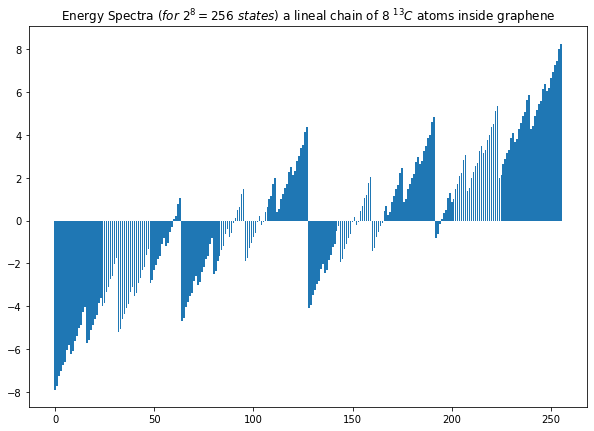

In [7]:
# Energies
def Energies():
  E=-hb/2*np.dot(A,W)#+J*hb/4*(np.dot(A(:,1),A(:,2))+np.dot(A(:,2),A(:,3))+...+np.dot(A(:,7),A(:,8)))
  # Lets sum the contribution due to first neighbors
  for i in range (1,n): # from 1 to 7 (A1A2 + A2A3+ ...+ A7A8)
      j=i-1 # Another index to use, because numeration of colums in A goes from 0 to 7
      E=E+J*hb/4*(A[:,j]*A[:,j+1])
  # Lets sum the contribution due to second neighbors
  for i in range (1,n-1): # from 1 to 6 (A1A3 + A2A4+ ...+ A6A8)
    j=i-1 # Another index to use, because numeration of colums in A goes from 0 to 7
    E=E+JP*hb/4*(A[:,j]*A[:,j+2])
  return E

print("The Energies of the system are:")    
E=Energies()
print(E)

# Creating plot
fig = plt.figure(figsize =(10, 7))

plt.bar(q,E)
 
plt.title("Energy Spectra ($for\ 2^8=256\ states$) a lineal chain of 8 $^{13}C$ atoms inside graphene")

# saving plot
plt.savefig('Energy_spectra_for_8_nuclear_spins.png')

# show plot
plt.show()

# Pulses

In [8]:
def Pulses():
  #Here we define the frequencies and phases that define the pulses
  E=Energies()
  w=(E[0]-E[1])
  phi=0
  tau=np.pi/omega
  return w,phi,tau

# Initial Conditions
$|\Psi_0\rangle=C_0|0\rangle=C_{00\cdots0}|00\cdots0\rangle\\
C_0=|C_0|^2=1$
### We will need to have a total probability equals to 1, since
$\langle\Psi|\Psi\rangle=\sum_{i=1}^n |C_i|^2=1$

In [9]:
def Initial_conditions():
  D0=np.zeros(2**n,dtype=np.csingle) 
  D0[0]=1+0j # All coefficients are in the state Zero except for the C_0
  prob=np.zeros(2**n)
  prob[0]=1 #Probability to be on the first state is 1
  ptot=1 #Probabilidad total inicial=1
  t0=0 # Tiempo inicial de simulación
  return (D0,prob,ptot,t0)
#print(D)
#print(prob)

# Integration of Differential equations
### We will use the ODEINT function

### We have that
\begin{eqnarray}
\hat{W}(t)|\Psi⟩=-\frac{\Omega}{2}\sum_{i=1}^{n=8}(S^+e^{i\theta}+S^{-}e^{-i\theta})|Ψ⟩\\
=-\frac{\Omega}{2}\sum_{i=1}^{n=8}(S^+e^{i\theta}+S^{-}e^{-i\theta})(\sum_{i=1}^{2^n}C_i|i⟩)
\end{eqnarray}

Where $\theta=wt+\phi$.


And
\begin{equation}
W=-\frac{\Omega}{2}
  \begin{pmatrix}
    0 & z & z & \cdots & 0\\
    z^* & 0 & z & \cdots & 0\\
    z^* & z^* & 0 & \cdots & 0\\
    \vdots & \vdots & \vdots & \cdots & \vdots\\
  \end{pmatrix}
\end{equation}
, where $z=e^{i\theta}$
We know that
\begin{eqnarray}
\dot{D}_p=W_{pq}D_q\\
\dot{D}_p=\frac{i\Omega}{2\hbar}\sum_{q=1}^{2^n} D_q e^{iw_{pq}t}(⟨p|\sum_{i=1}^{n}e^{i\theta}S^+|q⟩+⟨p|\sum_{i=1}^{n}e^{-i\theta}S^-|q⟩)
\end{eqnarray}


In [13]:
# Differential equations
#Wt=[[0 for _ in range(2**n)] for _ in range(2**n)] # Definition of the dimensionality for W(t) complex matrix
def Evolutionmatrix(Di,t,w,phi):
  Wt=np.zeros((2**n,2**n),dtype=np.csingle)
  for P in range(2**n):
    for Q in range(2**n):
      if (abs(sbin[P]-sbin[Q])==1):
        sign=sbin[P]-sbin[Q]
        Wt[P,Q]=1j*omega/2*(np.exp(-1j/hb*(E[P]-E[Q]*t))*np.exp(-1j*sign*(w*t+phi)))
      else:
        Wt[P,Q]=0
  return Wt

def Differential_equation(D,t,w,phi):
  Wt=Evolutionmatrix(D,t,w,phi)
  Dp=np.dot(Wt,D)
  return Dp

Di,prob,ptot,t0=Initial_conditions()
w,phi,tau=Pulses()
Dp=Differential_equation(Di,t0,w,phi)
print(Dp)

[ 0.        +0.j         -0.00994035+0.00109064j -0.00836418+0.00548092j
  0.        +0.j         -0.00458996+0.00888438j  0.        +0.j
  0.        +0.j          0.        +0.j          0.00043122+0.0099907j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.0053384 +0.00845585j  0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.00883431+0.00468561j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  

# Integración numérica

[  0.          17.45329252  34.90658504  52.35987756  69.81317008
  87.2664626  104.71975512 122.17304764 139.62634016 157.07963268] 10


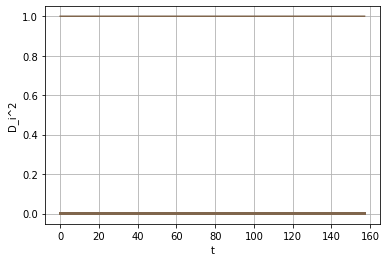

In [14]:
Di,prob,ptot,t0=Initial_conditions()
w,phi,tau=Pulses()
dt=0.11 #paso de tiempo
steps=10#int((tau-t0)/dt)

t=np.linspace(t0,tau,steps)

print(t,steps)
#D = odeintw(Differential_equation, Di, t, args=(w,phi))
D, infodict = odeintw(Differential_equation, Di, t, args=(w,phi),full_output=True)
#ipdb.set_trace(context=2)

color1 = (0.5, 0.4, 0.3)
color2 = (0.2, 0.2, 1.0)
plt.plot(t, D.real, color=color1, label='D0.real', linewidth=1.5)
#plt.plot(t, D[:,:].imag, '--', color=color1, label='D0.imag', linewidth=2)
#plt.plot(t, D[:, 1].real, color=color2, label='z2.real', linewidth=1.5)
#plt.plot(t, D[:, 1].imag, '--', color=color2, label='z2.imag', linewidth=2)
plt.xlabel('t')
plt.ylabel('D_i^2')
plt.grid(True)
#plt.legend(loc='best')
plt.show()


In [12]:
print(D)

[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 1.00000123e+00+1.16845570e-05j -2.20734779e-04+4.49574945e-05j
  -1.76327285e-04+1.40191562e-04j ... -3.22202726e-10-1.46244145e-10j
  -3.50221303e-10+5.04676688e-11j  3.23481977e-12-3.56765493e-13j]
 [ 1.00000223e+00+6.00150619e-06j -4.29197489e-04+1.28215125e-04j
  -3.24344917e-04+3.08949801e-04j ... -1.22791715e-10-3.52028617e-10j
  -2.93160205e-10-2.30345491e-10j  9.71008145e-13+8.72707341e-13j]
 ...
 [ 9.99998730e-01+3.67037354e-06j  1.29360743e-03+7.80438441e-04j
   1.50687669e-03+1.08752071e-04j ...  3.36219913e-10-4.71784404e-10j
   2.89367467e-11-5.78607761e-10j -7.93745054e-13+3.77464803e-13j]
 [ 9.99998704e-01+5.78198826e-06j  1.19250051e-03+5.79453468e-04j
   1.32560306e-03-2.45049937e-05j ...  1.96944809e-11-3.66646671e-10j
  -1.81018012e-10-3.19452803e-10j  1.85585687e-